In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

#### Importing the Data

In [2]:
#Importing the Data
data=pd.read_csv('movies.csv')
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Copying data for analysis
df=data.copy()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Data Inspection 1:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.shape

(7668, 15)

##### As we can see theres missing data in the dataset. 

In [6]:
# Checking the percentage of the missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print ('{} has {} % data missing.'.format(col,pct_missing))


name has 0.0 % data missing.
rating has 0.010041731872717789 % data missing.
genre has 0.0 % data missing.
year has 0.0 % data missing.
released has 0.0002608242044861763 % data missing.
score has 0.0003912363067292645 % data missing.
votes has 0.0003912363067292645 % data missing.
director has 0.0 % data missing.
writer has 0.0003912363067292645 % data missing.
star has 0.00013041210224308815 % data missing.
country has 0.0003912363067292645 % data missing.
budget has 0.2831246739697444 % data missing.
gross has 0.02464788732394366 % data missing.
company has 0.002217005738132499 % data missing.
runtime has 0.0005216484089723526 % data missing.


#### Data Cleaning

##### - Missing data

In [7]:
#Dropping the missing data
df.dropna(inplace=True)
df.shape

(5421, 15)

In [8]:
# Inspecting data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

##### - Changing the data types.
##### - Since budget and gross do not look great as float, I will transform them into int

In [9]:
# Changing the data type
df=df.astype({'budget':'int64','gross':'int64','votes':'int64'})
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
print(df.dtypes)
df.head()

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


##### Year of release:
We will create a new year of release column

In [11]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [32]:
pd.set_option('display.max_rows',None)

##### Duplicates

In [12]:
# Checking the duplicates
df.drop_duplicates
df.shape

(5421, 16)

##### There aren't any duplicates

#### Data Analysis
- Top 5s

In [13]:
# Top 5 grossing studios
df.groupby('company')['gross'].sum().sort_values(ascending = False).head()

company
Warner Bros.             54610959970
Universal Pictures       51241105418
Columbia Pictures        42356430218
Paramount Pictures       40021704691
Twentieth Century Fox    39542573303
Name: gross, dtype: int64

In [14]:
# Top 5 directors
df.groupby('director')['gross'].sum().sort_values(ascending = False).head()

director
Steven Spielberg    9629049370
Anthony Russo       6844248984
Peter Jackson       6618045788
Michael Bay         6451692798
James Cameron       6248088578
Name: gross, dtype: int64

In [15]:
# Top 5 stars
df.groupby('star')['gross'].sum().sort_values(ascending = False).head()

star
Robert Downey Jr.    11855937746
Tom Hanks             9899944903
Tom Cruise            9440309875
Will Smith            7947279234
Johnny Depp           7410125354
Name: gross, dtype: int64

##### Correlation
###### Budget vs gross
###### Company vs Gross

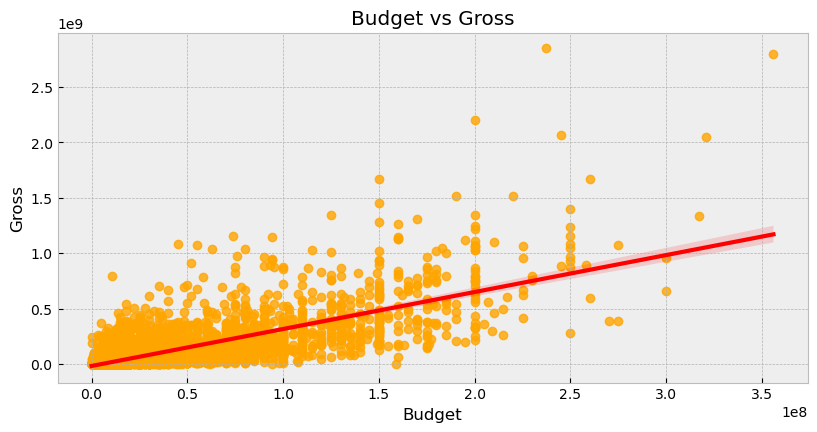

In [18]:
fig=plt.figure(figsize=(5,5))
axes=fig.add_axes([0.1,0.1,1.5,0.7])
sns.regplot(data=df,x='budget',y='gross',ax=axes,scatter_kws=({'color':'orange'}),line_kws=({'color':'red'}) )
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [20]:
df_corr=df[['budget','gross','runtime','votes','score','yearcorrect']].corr(method='pearson')
df_corr

,budget,gross,runtime,votes,score,yearcorrect
budget,1.000000,0.740247,0.318695,0.439675,0.072001,0.320312
gross,0.740247,1.000000,0.275796,0.614751,0.222556,0.268721
runtime,0.318695,0.275796,1.000000,0.352303,0.414068,0.075294
votes,0.439675,0.614751,0.352303,1.000000,0.474256,0.203098
score,0.072001,0.222556,0.414068,0.474256,1.000000,0.061923
yearcorrect,0.320312,0.268721,0.075294,0.203098,0.061923,1.000000


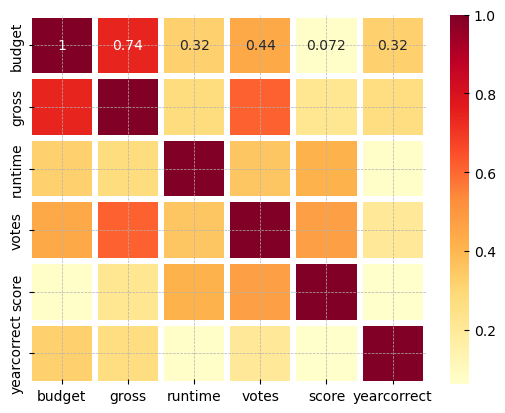

In [24]:
sns.heatmap(df_corr,linecolor='white',linewidth=3,cmap='YlOrRd',annot=True)
plt.show()